# Data Preprocessing

When humans think of tabulated data, there is a great variety in the different types of entries that can be stored in the table. For example, if we are creating a table of countries, it may look something like this:

| Name | Population | Size | Unemployment |      Continent    |
|:------------:|:-----------:|:------------:|:-----------:|:--------------:|
|      UK  |     3.0     |      5.2     |     2.3     | Europe |
|      Brazil     |     2.5     |      NaN     |     1.9     | South America |
|      India     |     3.0     |      5.2     |     NaN     | Asia |
| Nigeria   | 3.4         | NaN          | 2.3         | Africa |
| USA     | 3.0         | 5.1          | 1.8         | North America |

The population of each country is typically in the order of millions, whereas a likely value for the unemployment rate is probably somewhere between 1% and 20%, and the continent is a word rather than a number. Whilst this makes sense to a human, it is not in a useful format for a machine to read. 

In this section, we will present three methods for preprocessing data, that along with the ability to read and write `pd.DataFrame` objects, will be used to conduct simple machine learning on datasets from the real world. These are:

1. Handling missing values
2. Feature scaling
3. Categorical encoding

In [1]:
#Rember to Run this cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Handling Missing Values

Datasets are not perfect, and often contain missing values. In this section, we will learn about potential procedures to handle these missing values. We do this to prevent their non-existence to be misrepresented in our pre-processed dataset, which could skew any subsequent result. 

We should understand, however, that some kind of bias will necessarily be introduced by these procedures. In practice, the only way to make sure no bias is introduced at all is to have a dataset that is as complete as possible: no amount of synthetic data or smart replacement procedure can truly make up for missing data, just reduce its effects!


### Importing the data

We first import our data by running the `pd.read_csv(name_of_file)` command, as seen in the cell below. Note that in order to be found, the file must be in the same directory/folder from where you are running your notebook. Alternatively, you should provide the [absolute path to the file](https://www.linuxfoundation.org/blog/blog/classic-sysadmin-absolute-path-vs-relative-path-in-linux-unix#:~:text=What%20Is%20An%20Absolute%20Path,of%20actual%20filesystem%20from%20%2F%20directory.).

When we check the imported results using the `DataFrame.tail()` method (which shows the last rows of a table), it is clear that some data is missing, as has been replaced by `NaN`.  
The word `NaN` was originally a short notation for "Not A Number", to signal the result of operations like 1/0 or 0/0. Here, it is used as a general way to indicate a missing data.

| sepal_length | sepal_width | petal_length | petal_width |      class     |
|:------------:|:-----------:|:------------:|:-----------:|:--------------:|
|      6.7     |     3.0     |      5.2     |     2.3     | Iris-virginica |
|      6.3     |     2.5     |      NaN     |     1.9     | Iris-virginica |
|      6.5     |     3.0     |      5.2     |     NaN     | Iris-virginica |
| 6.2          | 3.4         | NaN          | 2.3         | Iris-virginica |
| 5.9          | 3.0         | 5.1          | 1.8         | Iris-virginica |


In [3]:
data = pd.read_csv('Lecture3Data/303-iris-unprocessed.csv')
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,NaN,1.9,Iris-virginica
147,6.5,3.0,5.2,NaN,Iris-virginica
148,6.2,3.4,NaN,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


There are two ways that the `NaN` values can be replaced. The first is eliminating the rows with missing data and the second is replacing the `NaN` values with some value representing an average of the remaining columns, [i.e.](https://warnell.uga.edu/sites/default/files/inline-files/ieVeg.pdf), using the mean, median or mode.

> An alternative to replacing the `NaN` values with the averages is by using more sophisticated interpolation techniques. This will not be covered in the course but you should take a few seconds (or more) thinking about how this could be done.

### Removing Missing Data

Removing missing data is simpler than replacing it, because `pandas` has a function that efficiently does this for us:

```python
data_removed = data.copy().dropna()
```

> Note that we use `data.copy()` instead of `data` just to ensure that we do not damage the original dataset - **this is not essential but is good practice**

If `data_removed` is called, it can be seen that the number of rows is now 131 rather than the original 150.

In [4]:
data_removed = data.copy().dropna()
data_removed

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica


### Replacing Missing Data

Whilst simply removing missing data is easier and is often fine, it is sometimes preferable to replace it with the mean, median or mode of the column. In the cell below, we show how `pandas` makes this easy, by using the `DataFrame.fillna()` method.

```python
mean_values = {
    'sepal_length': data_replaced['sepal_length'].mean(),
    'sepal_width': data_replaced['sepal_width'].mean(),
    'petal_length': data_replaced['petal_length'].mean(),
    'petal_width': data_replaced['petal_width'].mean(),
}
data_replaced_mean = data_replaced.copy().fillna(value=mean_values)
```

The `value` keyword argument takes a dictionary of values to replace the `NaN` values with. Our dictionary contains the mean (or median) of each column.

In [5]:
# make copy of original data
data_replaced = data.copy()

# use mean values
mean_values = {
    'sepal_length': data_replaced['sepal_length'].mean(),
    'sepal_width': data_replaced['sepal_width'].mean(),
    'petal_length': data_replaced['petal_length'].mean(),
    'petal_width': data_replaced['petal_width'].mean(),
}
data_replaced_mean = data_replaced.copy().fillna(value=mean_values)
print(f'Data with NaN replaced by the mean:\n\n{data_replaced_mean}\n')

# use median values
median_values = {
    'sepal_length': data_replaced['sepal_length'].median(),
    'sepal_width': data_replaced['sepal_width'].median(),
    'petal_length': data_replaced['petal_length'].median(),
    'petal_width': data_replaced['petal_width'].median(),
}
data_replaced_median = data_replaced.copy().fillna(value=median_values)
print(f'Data with NaN replaced by the median:\n\n{data_replaced_median}\n')


Data with NaN replaced by the mean:

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5      1.400000     0.200000     Iris-setosa
1             4.9          3.0      1.400000     0.200000     Iris-setosa
2             4.7          3.2      1.300000     0.200000     Iris-setosa
3             4.6          3.1      1.500000     0.200000     Iris-setosa
4             5.0          3.6      1.400000     0.200000     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0      5.200000     2.300000  Iris-virginica
146           6.3          2.5      3.763448     1.900000  Iris-virginica
147           6.5          3.0      5.200000     1.189726  Iris-virginica
148           6.2          3.4      3.763448     2.300000  Iris-virginica
149           5.9          3.0      5.100000     1.800000  Iris-virginica

[150 rows x 5 columns]

Data with NaN replaced by the median:

     sepal_

## Feature Scaling

After dealing with missing values, the next step of the pre-processing pipeline is a procedure called **feature scaling**. 

In order to understand why scaling is important, you have to appreciate that many machine learning algorithms have been developed to calculate how much two objects "differ" from each other. In some way, we could say that we want to calculate some form of *distance* between these objects.  

You are probably very familiar with the typical distance calculated via Pitagora's rule in *N-D* (N-Dimensional) Euclidean space $d=\sqrt{\sum_{i=1}^N x_i^2}$. This is just one possible definition of distance but [others can be used](https://en.wikipedia.org/wiki/Distance). In general, when considering an N-dimensional space that might include heterogeneous data, for example, a height and weight, defining a useful distance requires different type of data to be scaled properly in relation to each other. 

Let us make an example: you might agree that the body of a person that is 1.80m and weighs 90kg is more similar to that of a person that measure 1.70 and weighs 80kg rather than a person that is 1.0m and weights 90kg. However, if you took a simple Euclidean distance using the pure (non-dimensional) values, this would not be the case.  

You might argue (and in some other context, rightly so!) that the problem is that we are comparing apples with oranges! Although you often hear this is something one should never do, we actually do it all the time when we classify objects. In fact, we do that by collecting data regarding size, shape, colour, smell and many other heterogeneous characteristics, which we blend together to create a definition of distance that we use to tell apart different objects. 

When many various objects are "close" together (according to our definition of distance) and separated from other groups - in jargon, they "form a cluster" - we often say they are similar and we give them a specific name. **This is what classification means in operative terms.**

Because classification is an important task, we would like our algorithms to be able to do it reliably and efficiently. As this requires often using different types of data, which we have seen in the previous example might lead to strange effects, *feature scaling* enters the game. 

Let us see how this works by using the previous example again. If instead of comparing the absolute values of the height and the weight, we would have used their value divided by that of an average person, we would have probably reached a more agreeable conclusion on who is more similar to who, even using a simple Euclidean distance. This "division" is nothing but one possible type of *feature scaling*. 

Before we introduce the different typical forms of feature scaling, it is important to highlight that this procedure is important for both classification and regression, not just the former.

### Min-Max scaler

The min-max scaler uses the following equation to scale the values in a column linearly between 0 and 1.

\begin{align}
x_{new} = \frac{x - x_{min}}{x_{max}-x_{min}}
\end{align}

For example, if we take the `sepal_length` column of the dataset previously opened and do this transformation, the result can be seen below:

In [12]:
data_minmax = data_replaced_mean.copy()
minmax_example = pd.DataFrame(
    {'unscaled': data_minmax['sepal_length']}
)
min_value = min(minmax_example['unscaled'])
max_value = max(minmax_example['unscaled'])
diff = max_value - min_value
minmax_example['scaled'] = minmax_example['unscaled'].apply(
    lambda x: (x - min_value) / diff
)
print(minmax_example.head())

   unscaled    scaled
0       5.1  0.222222
1       4.9  0.166667
2       4.7  0.111111
3       4.6  0.083333
4       5.0  0.194444


### Standard scaler

The standard scaler takes the difference from the mean and scales the data to ensure that the standard deviation is equal to 1, using the following equation:

\begin{align}
x_{new} = \frac{x-\mu}{\sigma},
\end{align}

where $\mu$ and $\sigma$ are the average and variance, respectively, of mean-square-root deviation of our dataset, respectively.

For example, if we take the `sepal_length` column and do this transformation, the result can be seen below:

In [6]:
data_standard = data_replaced_mean.copy()
standard_example = pd.DataFrame(
    {'unscaled': data_standard['sepal_length']}
)
mean = standard_example['unscaled'].mean()
std = standard_example['unscaled'].std()
standard_example['scaled'] = standard_example['unscaled'].apply(
    lambda x: (x - mean) / std
)
print(standard_example.head())

   unscaled    scaled
0       5.1 -0.894475
1       4.9 -1.137903
2       4.7 -1.381331
3       4.6 -1.503045
4       5.0 -1.016189


## Visualising the scalers

In the plot below, we show a comparison between the two scaling methods. The min-max scaler, seen as red circles, goes from 0 to 1, whereas the data processed by the standard scaler goes from around -2 to 2. 

Remember that because of its definition, the limits of the *standard scaler* cannot be exactly calculated. However, you should expect about 98% of your data to be within [-2,2], at least if they follow a Gaussian distribution, because the variance after scaling will be exactly 1.0. 

There is one more caveat to mention before wrapping up this section. Both of these scalers are affected by outliers. There are a variety of different scaling techniques and we have only presented two which are both very simple, but fall short in cases when the data has outliers which can skew the mean. In future lectures, we will introduce the use of more sophisticated pre-built scalers when we will introduce the `sci-kit learn` Python library, a package specifically devised for Machine Learning.

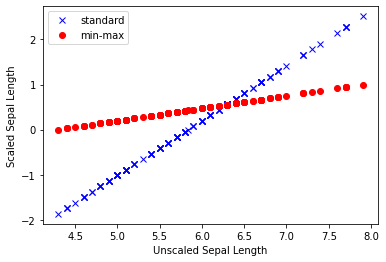

In [7]:
fig, ax = plt.subplots()
ax.plot(standard_example['unscaled'], standard_example['scaled'], 'bx', label='standard')
ax.plot(minmax_example['unscaled'], minmax_example['scaled'], 'ro', label='min-max')
ax.set_xlabel('Unscaled Sepal Length')
ax.set_ylabel('Scaled Sepal Length')
ax.legend()
None

## Encoding categories

The final step of preprocessing the data is to encode the value of categorical variables, also called classes (not to be confused with a Python `class`!), into numerical data.

Below we show the two main types of encoder which facilitates this conversion.

### Label (Ordinal) Encoder

The Label Encoder is used to assign a number to each class in a category. To be clear on the definitions of `class` and `category` in a data science context, a `category` called `animal` could have different `class` names such as `dog`, `cat`, `badger`.

**A Label Encoder is useful because it replaces an alphanumerical tag with a number.** 

The inner workings of a Lable Encoder is shown by the code below, which uses the `set` class to create a dictionary of the different classes:

```python
classes = set(data_labelencoded['class'])
values = {list(classes)[i]: i for i in range(len(classes))} # returns a dictionary which has been printed
```

After this we make use of the `pd.DataFrame.apply()` method to convert the initial `class` column, which had values of `Iris-virginica`, `Iris-setosa` and `Iris-versicolor` to the new values `0`, `1`, and `2`.

```python
data_labelencoded['class'] = data_labelencoded['class'].apply(lambda x: values[x])
```

The problem with this simple Label Encoder is that it inadvertedly creates a hierachy within the data, which might not have any real meaning considering the objects we want to describe. 

For example, after applying this encoder to the dataset, the `class` "iris-setosa" is tagged as "1", and the class "Iris-virginica" becomes "0". We have thus created an order out of categories for which the definition of 'greater than' does not really exists, and can actually cause problems during classification or inference. 

A hierarchical order is not wrong per se. For categories with an inner ordered structure, for example, this information can be useful for making predictions. For example, for a category such as `education_level`, that has an intrinsic order ranging from `GCSE` to `PhD`, a simple Label Encoder might not be a bad choice. 

The important thing to remember is that, when pre-processing data, we should do that in such a way that we are not biasing the data or, in other words, we are not creating information (for example, imposing a non-existent structure) where there was none.

### One Hot Encoder

The One Hot Encoder is used to avoid the problem of accidentally making your class system hierarchical. Instead of ranking classes from 1 to N (so that N is bigger than 1), each one is replaced by an entire boolean column (i.e. each column can only be filled with 0 or 1). 

This is much more clearly understood by looking at the cell below where we show the inner working of the One Hot Encoder. In practice, we use the `pd.DataFrame.apply()` method to create a new column for each of the different classes. If a data entry belong to that specific class, its value in the newly created class column would be 1, and 0 otherwise.

Note that after this operation, we can delete the original column named `class` because it is obselete, as its values can be reconstructed by reversing the One Hot Encoder.

> When you start deleting columns in `pd.DataFrame` objects, you must ensure that you have the data somewhere in you system otherwise you could lose it and have to re-import it. For large databases, this might require a lot of time!

```python
for cls in classes:
    column = cls.replace('Iris', 'class')
    data_onehotencoded[column] = data_onehotencoded['class'].apply(lambda x: 1 if x == cls else 0)
del data_onehotencoded['class']
```

In [9]:
data_onehotencoded = data.copy()
classes = set(data_onehotencoded['class'])
for cls in classes:
    column = cls.replace('Iris', 'class')
    data_onehotencoded[column] = data_onehotencoded['class'].apply(lambda x: 1 if x == cls else 0)
del data_onehotencoded['class']
data_onehotencoded

,sepal_length,sepal_width,petal_length,petal_width,class-virginica,class-setosa,class-versicolor
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,0,0
146,6.3,2.5,NaN,1.9,1,0,0
147,6.5,3.0,5.2,NaN,1,0,0
148,6.2,3.4,NaN,2.3,1,0,0


## Summary

In this section, we have presented a handful of methods for tidying data for machine learning. These skills primarily focus ont the use of `pandas` and a little on the use of `numpy`. Whilst the steps have been conducted in order on the Iris dataset, we have not created a final dataset that would be ready to use. This has been left as an exercise. In reality, a user would construct a data pipeline that would consist of a single function that would wrap around all of these methods to streamline and improve the easy-of-use of these functionalities.